# Topic Modeling & Clustering

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
with open('grant_df_lemma.pickle','rb') as g:
    df = pickle.load(g)

In [3]:
print('df columns: \n\n', df.columns)

df columns: 

 Index(['grantmaker', 'grantmaker_state', 'recipient', 'recip_city',
       'recip_state_cntry', 'subject', 'year', 'amount', 'strategy',
       'description', 'gift_type', 'lemma', 'n_gram', 'ent'],
      dtype='object')


In [4]:
df.gift_type.unique()

array(['transformative', 'major'], dtype=object)

In [5]:
major_idx = np.where(df.gift_type == 'major')
print('num major gifts = ', len(major_idx[0]))

transf_idx = np.where(df.gift_type == 'transformative')
print('num transformational gifts = ', len(transf_idx[0]))

num major gifts =  768
num transformational gifts =  268


## Topic Modeling: NMF

In [6]:
from sklearn.decomposition import NMF

In [7]:
with open('mtx_terms_dict.pickle','rb') as g:
    mtx_terms_dict = pickle.load(g)

In [8]:
dt_type = 'lemma' #choose 'lemma', 'n_gram', or 'ent'
print('tokens type: ', dt_type, '\n')

dt, terms = mtx_terms_dict[dt_type][0], mtx_terms_dict[dt_type][1]
print('# docs: ', dt.shape[0])
print('# terms: ', dt.shape[1])

tokens type:  lemma 

# docs:  1036
# terms:  1460


In [9]:
terms

array(['10', '12', '19', ..., 'young', 'youth', 'zone'], dtype=object)

In [10]:
#### HYPERPARAM - IDX_TYPE ####

idx_type = major_idx #choose major_idx, transf_idx, or None

if idx_type != None:
    dt = dt[idx_type] 

print('dt rows = ', dt.shape[0])

dt rows =  768


In [11]:
nmf = NMF(10) #choose num topics
W = nmf.fit_transform(dt)
H = nmf.components_
print('# topics: ', H.shape[0])

# topics:  10


/Users/oliviaoffutt/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [12]:
W.shape

(768, 10)

In [13]:
#get top terms for each topic w/ pct contribution to topic
def display_topics(n_terms, nmf=nmf, terms=terms):
    for topic, vec in enumerate(nmf.components_):
        total = vec.sum()
        largest = vec.argsort()[::-1]
        print('\nTopic %02d' % topic)
        for i in range(0, n_terms):
            print(' %s (%2.2f)' % (terms[largest[i]],
                                  vec[largest[i]]*100.0/total))

In [14]:
display_topics(4,nmf,terms) #choose numnber of terms to see


Topic 00
 general (50.14)
 support (36.97)
 capacity (1.35)
 building (1.32)

Topic 01
 purchase (29.46)
 equipment (28.48)
 computer (9.89)
 furnishing (5.37)

Topic 02
 program (16.40)
 college (12.02)
 success (4.74)
 bound (3.63)

Topic 03
 operating (52.81)
 general (7.80)
 support (4.01)
 give (3.45)

Topic 04
 operation (26.59)
 organization (21.39)
 general (12.93)
 operations (2.58)

Topic 05
 scholarship (34.20)
 student (7.84)
 fund (7.07)
 award (2.85)

Topic 06
 matching (17.95)
 gift (17.12)
 discretionary (16.91)
 trustee (16.66)

Topic 07
 education (19.91)
 youth (3.91)
 music (2.97)
 chicago (2.80)

Topic 08
 grant (19.89)
 unrestricted (18.25)
 give (12.77)
 honorary (11.84)

Topic 09
 school (3.79)
 student (2.21)
 high (1.69)
 support (1.22)


In [15]:
import random

In [16]:
#topic tester
df_i = random.choice(idx_type[0])
li = list(idx_type[0])
W_i = li.index(df_i)
print(W[W_i])
print(df['description'][df_i])

[0.         0.         0.16515789 0.00201211 0.         0.
 0.         0.         0.         0.        ]
College Access and Success for Oswego County


In [17]:
# define the categories
topics_dict = {0: 'School Programs', 1: 'General Support', 2: 'Arts', 3: 'NY/Boston', 4: 'After School Programs',
             5: 'Early Education', 6: 'Scholarship', 7: 'College & Career Success', 8: 'Health/Foster', 9: 'Job/Career Training'}


In [18]:
# For each document, get the index for the highest topic coefficient
top_topic_idx = []

for doc in W:
    top_topic_idx.append(np.argmax(doc))

In [19]:
topics_dict

{0: 'School Programs',
 1: 'General Support',
 2: 'Arts',
 3: 'NY/Boston',
 4: 'After School Programs',
 5: 'Early Education',
 6: 'Scholarship',
 7: 'College & Career Success',
 8: 'Health/Foster',
 9: 'Job/Career Training'}

In [20]:
# Use the index to map to the actual topic in `topics`

doc_topics = []

for i in top_topic_idx:
    doc_topics.append(topics_dict[i])

In [21]:
#topic tester pt 2
df_i = random.choice(idx_type[0]) #find index of df
li = list(idx_type[0]) 
W_i = li.index(df_i) #find index of doc-topic matrix
print(doc_topics[W_i])
print(df['description'][df_i])

School Programs
General support


### *Visualizing*

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
len(doc_topics)

768

In [24]:
W.shape

(768, 10)

In [25]:
df.columns

Index(['grantmaker', 'grantmaker_state', 'recipient', 'recip_city',
       'recip_state_cntry', 'subject', 'year', 'amount', 'strategy',
       'description', 'gift_type', 'lemma', 'n_gram', 'ent'],
      dtype='object')

In [26]:
W

array([[4.13864798e-02, 0.00000000e+00, 1.00052014e-01, ...,
        0.00000000e+00, 0.00000000e+00, 2.25795894e-01],
       [0.00000000e+00, 4.46143663e-04, 1.67157900e-02, ...,
        3.67064412e-03, 4.73338249e-02, 2.57673802e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.43805590e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.05389958e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.17738421e-01, 0.00000000e+00, 0.00000000e+00]])

In [27]:
top_topic_val = []

for doc in W:
    top_topic_val.append(np.max(doc))

In [28]:
d = {'grantmaker': df['grantmaker'][idx_type[0]], 'topic': doc_topics, 'topic_val': top_topic_val, 'amount': df['amount'][idx_type[0]], 'desc': df['description'][idx_type[0]]}

In [29]:
df_rec = pd.DataFrame(d)

In [30]:
df_rec

,grantmaker,topic,topic_val,amount,desc
47,Ford Foundation,Job/Career Training,0.225796,98950.0,General support for a free program that prepar...
48,Point32Health Foundation,After School Programs,0.101558,90000.0,Point32health Foundation announced today grant...
49,East Bay Community Foundation,Early Education,0.034389,85143.0,The Mcclymonds Merit Awards
50,Seattle Foundation,Job/Career Training,0.004095,84000.0,NCCP-supporting Research Informed IECMH Policies.
51,East Bay Community Foundation,Early Education,0.034389,83047.0,The Mcclymonds Merit Awards
...,...,...,...,...,...
1031,East Bay Community Foundation,School Programs,0.305390,5000.0,General support
1032,New York Community Trust,Early Education,0.146566,5000.0,For college scholarship for graduating senior ...
1033,The Susan A. & Donald P. Babson Charitable Fou...,Arts,0.243806,5000.0,College Quest
1034,New York Community Trust,School Programs,0.305390,5000.0,For general support.


In [31]:
if idx_type == major_idx:
    with open('df_rec_major.pickle', 'wb') as f:
        pickle.dump(df_rec, f)
    df_rec.to_csv('df_rec_major.csv')
elif idx_type == transf_idx:
    with open('df_rec_transf.pickle', 'wb') as f:
        pickle.dump(df_rec, f)
    df_rec.to_csv('df_rec_transf.csv')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

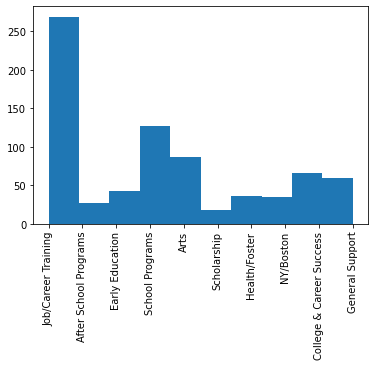

In [32]:
plt.hist(df_rec['topic'])
plt.xticks(rotation=90)


## Recommendations / Recommender

In [33]:
with open('df_rec_major.pickle','rb') as g:
    df_rec_maj = pickle.load(g)
with open('df_rec_transf.pickle','rb') as g:
    df_rec_tra = pickle.load(g)

In [34]:
does_not_exist

NameError: name 'does_not_exist' is not defined

## Topic Modeling: CorEx

In [ ]:
import scipy.sparse as ss
from corextopic import corextopic as ct

In [ ]:
dt.shape

In [ ]:
terms.shape

In [ ]:
words = terms.tolist()

In [ ]:
len(words)

In [ ]:
anchors = [['operation','operating','general'],
           ['purchase','equipment'],
           ['scholarship'],
          ['social', 'emotional','youth','program'],
          ['workforce', 'job', 'career','college'],
          ['school','student','classroom']]

In [ ]:
topic_model = ct.Corex(n_hidden = 6,
                      words = words)

In [ ]:
topic_model.fit(dt, words = words,
                anchors = anchors, anchor_strength = 6)

In [ ]:
topics = topic_model.get_topics()

In [ ]:
topics

In [ ]:
for topic_n,topic in enumerate(topics):
    # w: word, mi: mutual information, s: sign
    topic = [(w,mi,s) if s > 0 else ('~'+w,mi,s) for w,mi,s in topic]
    # Unpack the info about the topic
    words,mis,signs = zip(*topic)    
    # Print topic
    topic_str = str(topic_n+1)+': '+', '.join(words)
    print(topic_str)

## Scattertext

In [ ]:
#create scattertext to do intial data exploration
import scattertext as st
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
corpus = st.CorpusFromPandas(df,
                            category_col = 'gift_type',
                            text_col = 'lemma', #choose 'lemma', 'n_gram', or 'ent'
                            nlp = nlp).build()

In [ ]:
html = st.produce_scattertext_explorer(corpus,
             category='transformative',
             category_name='Transformative',
             not_category_name='Major',
             width_in_pixels=1000,
             metadata=df['recipient'])

In [ ]:
open('scatterplots/lemma.html','wb').write(html.encode('utf-8'))

## K Means Clustering

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
inertia = []
for num_clusters in range(1,13):
    km = KMeans(n_clusters = num_clusters)
    km.fit(dt)
    inertia.append(km.inertia_)
inertia

In [ ]:
plt.plot(range(1,len(inertia) +1), inertia)

In [ ]:
clusters = 2

km = KMeans(n_clusters = clusters, random_state = 11)
km.fit(dt)

In [ ]:
np.unique(km.labels_, return_counts = True)

In [ ]:
sizes = []
for i in range(clusters):
              sizes.append({'cluster': i, 'size':
                           np.sum(km.labels_ == i)})
pd.DataFrame(sizes).set_index('cluster').plot.bar(figsize = (16,9))

In [ ]:
plt.scatter()